### Описание
Этот набор данных предоставляет обзор различных факторов, которые влияют на выигрыш спортсменов на соревнованиях.

# Подключение модулей

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install openpyxl
%pip install seaborn
import seaborn as sns

### Загрузка данных

In [18]:
df = pd.read_excel("3_OLYMPICS_athlete_events.xlsx")

In [19]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Описание данных

- **id**
- **Name** - Имя
- **Sex** - Пол
- **Age** - Возраст
- **Height** - Высота
- **Weight** - Вес
- **Team** - Команда страны
- **NOC** - Национальный олимпийский комитет
- **Games** - Игры
- **Year** - Год
- **Season** - Время года
- **City** - Город
- **Sport** - Вид спорта
- **Event** - Мероприятие
- **Medal** - Награда

In [20]:
df.shape

(271116, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 20.7+ MB


Всего 271 116 строк и 15 столбцов с данными об олимпийских спортсменах, где есть пропуски в колонках «Age», «Height», «Weight».

In [22]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Есть аномалии в весе,росте и возрасте.

In [28]:
df = df[(df['Weight'] >= 30) & (df['Weight'] <= 190)].copy()
df.describe()

,ID,Age,Height,Weight,Year
count,208218.000000,207356.000000,206830.000000,208218.000000,208218.000000
mean,68575.792612,25.064261,175.362206,70.704593,1989.382647
std,39003.687119,5.489081,10.536608,14.332849,20.455066
min,1.000000,11.000000,127.000000,30.000000,1896.000000
25%,35134.250000,21.000000,168.000000,60.000000,1976.000000
50%,68605.000000,24.000000,175.000000,70.000000,1992.000000
75%,102276.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,190.000000,2016.000000


Убрали аномалию в весе

In [29]:
anomalous_height = df[df['Height'] > 220]
print(f"Количество людей с ростом > 220 см: {anomalous_height.shape[0]}")
anomalous_height

Количество людей с ростом > 220 см: 11


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
17669,9407,Gunther Behnke,M,29.0,221.0,114.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
32376,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver
59371,30409,Roberto Dueas Hernndez,M,24.0,221.0,137.0,Spain,ESP,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
59372,30409,Roberto Dueas Hernndez,M,28.0,221.0,137.0,Spain,ESP,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
207373,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
207374,104059,Arvydas Romas Sabonis,M,27.0,223.0,122.0,Lithuania,LTU,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze
207375,104059,Arvydas Romas Sabonis,M,31.0,223.0,122.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN


Проверили спортсменов выше 220 см. Посчитала это нормой, а не аномалией, ведь это баскетболисты.

In [30]:
anomalous_age = df[df['Age'] > 70]
print(f"Количество строк с возрастом > 70 лет: {anomalous_age.shape[0]}")

print("\nПервые записи:")
print(anomalous_age[['Name', 'Age', 'Sport', 'Year']].head())

print("\nУникальные виды спорта для возраста > 70 лет:")
print(anomalous_age['Sport'].unique())

Количество строк с возрастом > 70 лет: 1

Первые записи:
                  Name   Age          Sport  Year
97374  Hiroshi Hoketsu  71.0  Equestrianism  2012

Уникальные виды спорта для возраста > 70 лет:
['Equestrianism']


Проверили спортсменов старше 70. Посчитала это нормой,ведь спортсмены старше 70 занимаются более безопасными видами спорта,что позволяет им учавствовать.

In [31]:
df.describe(include = "O")

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,208218,208218,208218,208218,208218,208218,208218,208218,208218,30454
unique,100121,2,680,226,51,2,42,56,594,3
top,Heikki Ilmari Savolainen,M,United States,USA,2000 Summer,Summer,London,Athletics,Ice Hockey Men's Ice Hockey,Gold
freq,39,141466,13790,14292,13690,168675,14082,32601,3839,10253


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208218 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      208218 non-null  int64  
 1   Name    208218 non-null  object 
 2   Sex     208218 non-null  object 
 3   Age     207356 non-null  float64
 4   Height  206830 non-null  float64
 5   Weight  208218 non-null  float64
 6   Team    208218 non-null  object 
 7   NOC     208218 non-null  object 
 8   Games   208218 non-null  object 
 9   Year    208218 non-null  int64  
 10  Season  208218 non-null  object 
 11  City    208218 non-null  object 
 12  Sport   208218 non-null  object 
 13  Event   208218 non-null  object 
 14  Medal   30454 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 17.5+ MB


### Вывод

Есть пропущенные значения в столбцах Age и Height

In [33]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age          862
Height      1388
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     177764
dtype: int64

In [35]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())

Заполнила пропущенные значения медианой, потому что таким образом можно избежать очень высокие или низкие значения.

In [36]:
print(df.duplicated().sum())

37


Всего 37 дубликатов.

In [37]:
df = df.drop_duplicates()

In [38]:
print(df.duplicated().sum())

0


Удалила все полные дубликаты (строки,где все значения повторяются).

In [39]:
df = df.drop(["ID"],axis = 1)

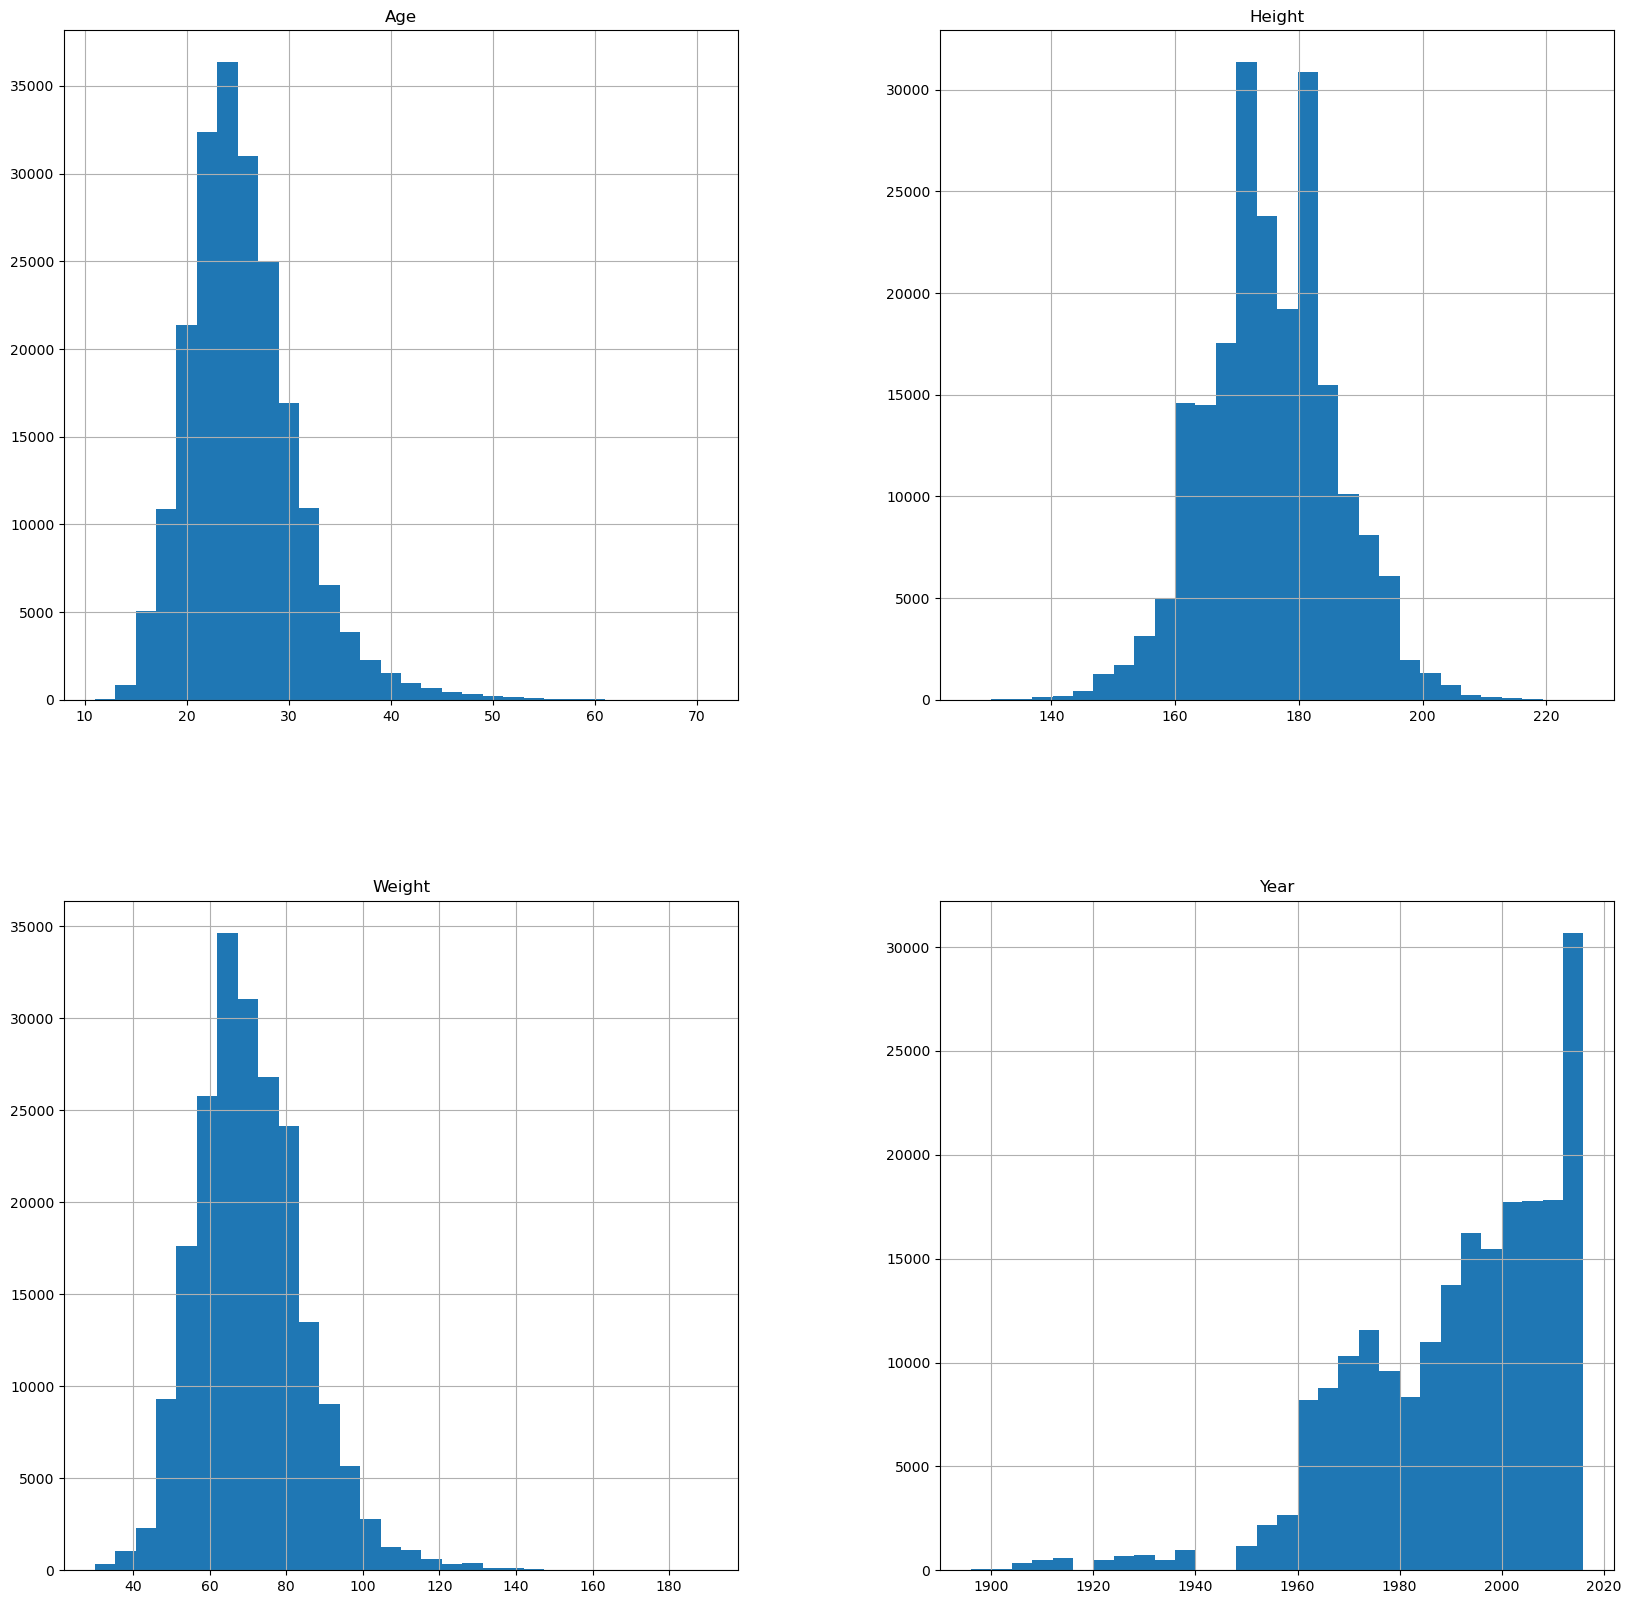

In [40]:

df.hist(figsize=(20,20), bins = 30);

- Age - В оснавном возраст спортсменов находится в диапазоне от 20 до 40
- Height - В оснавном рост спортсменов находится в диапазоне от 170 до 180
- Weight - В оснавном вес спортсменов находится в диапазоне от 65 до 75
- Year - В оснавном игры проходили с 2000 до 2016. Также игры не проводились в 1916-1920 и 1940-1945 годах

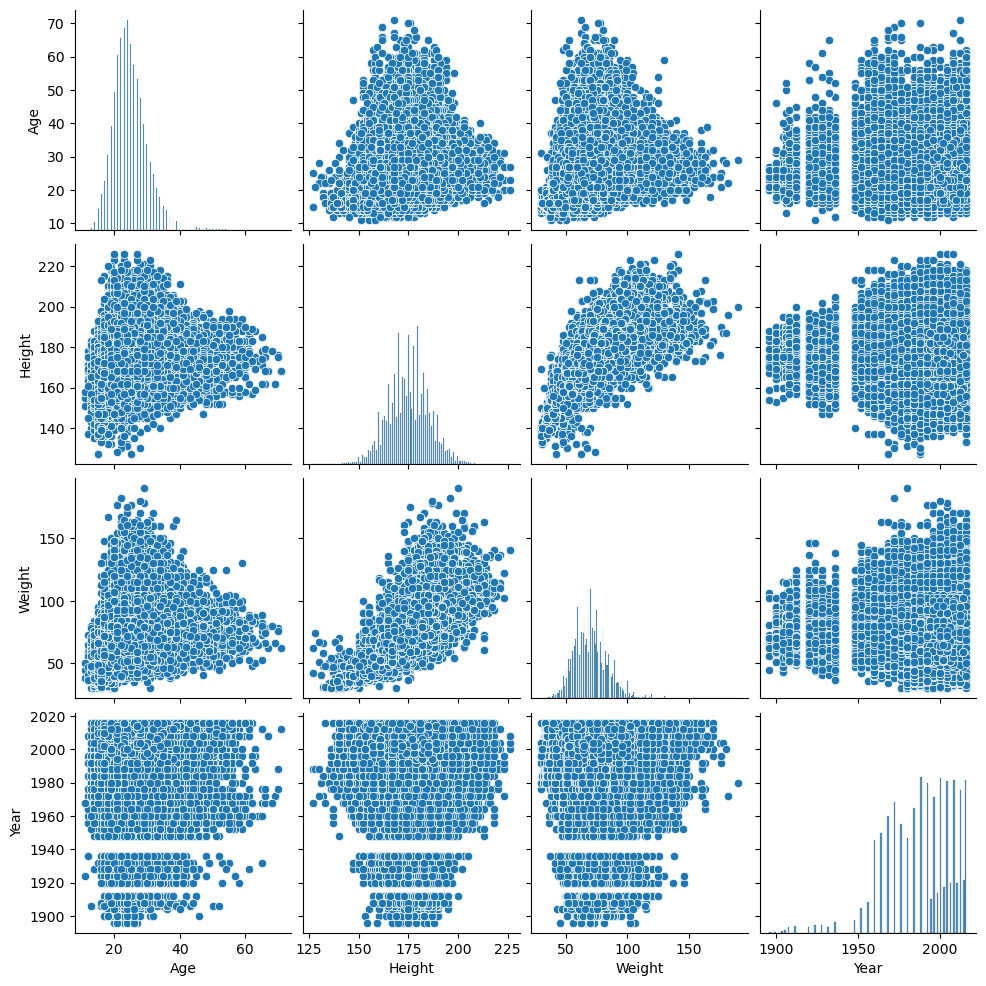

In [41]:
sns.pairplot(df)

In [42]:
df["Season"].value_counts()

Season
Summer    168638
Winter     39543
Name: count, dtype: int64

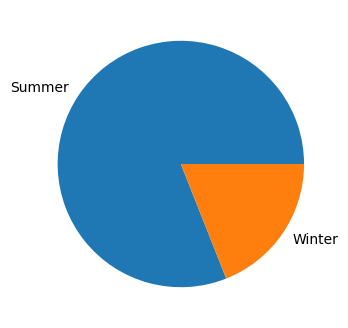

In [43]:
plt.figure(figsize = (4,4)) 
plt.pie(df["Season"].value_counts(),labels = df["Season"].value_counts().index);

In [44]:
df.groupby('Season')['Sport'].nunique().to_frame()

,Sport
Season,
Summer,43
Winter,15


Большинство игр было проведено летом.

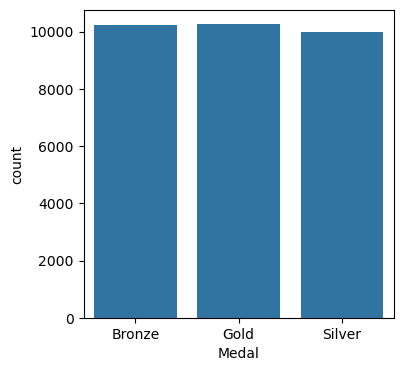

In [45]:
plt.figure(figsize = (4,4)) 
sns.countplot(data = df,x ="Medal");

In [46]:
df["IdMedal"] = df ["Medal"].replace("Gold",0)
df["IdMedal"] = df ["IdMedal"].replace("Silver",1)
df["IdMedal"] = df ["IdMedal"].replace("Bronze",2)


<ipython-input-46-190c85067932>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["IdMedal"] = df ["IdMedal"].replace("Bronze",2)


In [47]:
df["IdSex"] = df ["Sex"].replace("M",0)
df["IdSex"] = df ["IdSex"].replace("F",1)

<ipython-input-47-d12450e1a2e2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["IdSex"] = df ["IdSex"].replace("F",1)


In [48]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IdMedal,IdSex
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,NaN,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,NaN,0
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN,1
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,NaN,1
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN,1


In [49]:
df.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'IdMedal',
       'IdSex'],
      dtype='object')

In [50]:
df_corr = df[['Age', 'Height', 'Weight','Year','IdMedal','IdSex']].corr()
df_corr

,Age,Height,Weight,Year,IdMedal,IdSex
Age,1.000000,0.140804,0.211776,0.085741,0.011994,-0.160180
Height,0.140804,1.000000,0.792751,0.048470,-0.024105,-0.489981
Weight,0.211776,0.792751,1.000000,0.019089,-0.019258,-0.511566
Year,0.085741,0.048470,0.019089,1.000000,0.038521,0.213859
IdMedal,0.011994,-0.024105,-0.019258,0.038521,1.000000,0.004073
IdSex,-0.160180,-0.489981,-0.511566,0.213859,0.004073,1.000000


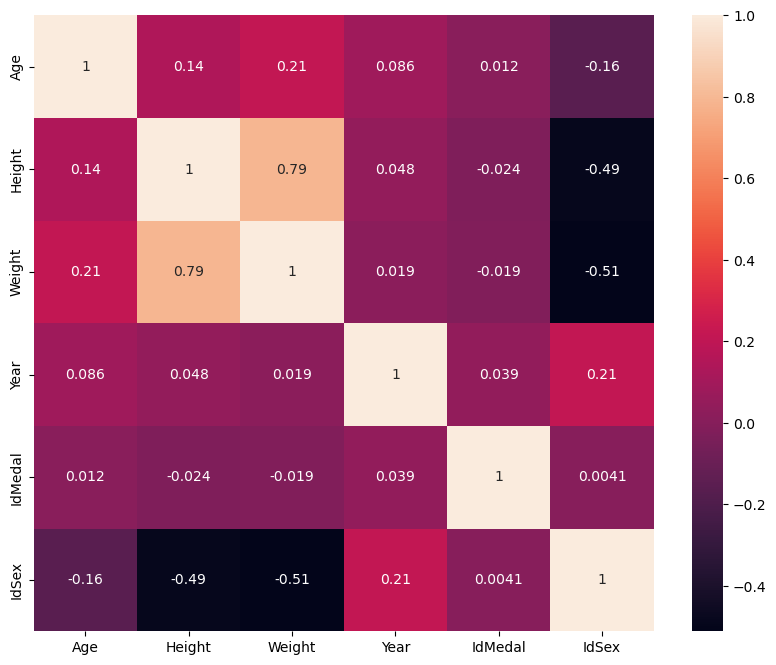

In [51]:
plt.figure(figsize = (10,8))
sns.heatmap(df_corr,annot = True);

Самая сильная корреляция между ростом и весом спортсменов.

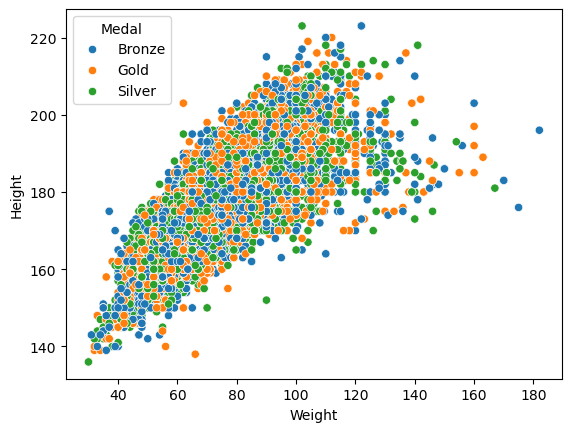

In [52]:
sns.scatterplot(data = df,x = "Weight",y = "Height",hue = "Medal");

Рост медалистов примерно одинаков, независимо от типа медали.

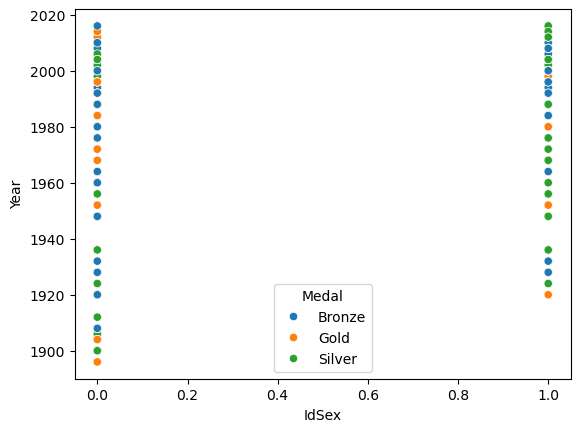

In [53]:
sns.scatterplot(data = df,x = "IdSex",y = "Year",hue = "Medal");

Женщины начали получать медали позже мужчин, что отражает их более позднее включение в Олимпийские игры.

<Axes: xlabel='Medal', ylabel='count'>

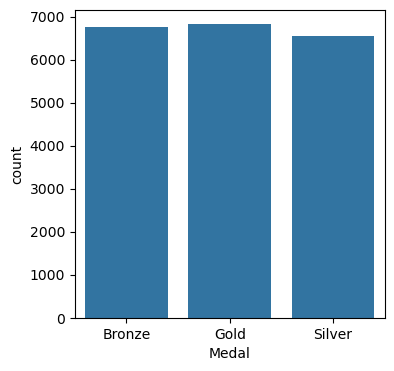

In [54]:
plt.figure(figsize = (4,4)) 
sns.countplot(data = df[df['IdSex'] == 0], x ="Medal")

- Тут показано,что мужчины больше всего получали золото,а меньше всего серебро.

<Axes: xlabel='Medal', ylabel='count'>

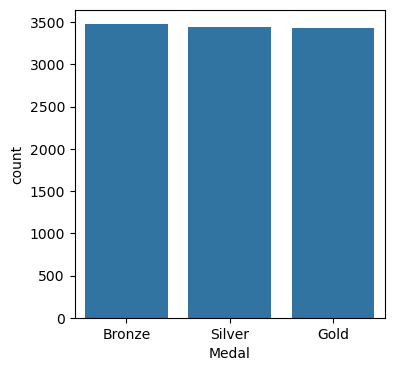

In [55]:
plt.figure(figsize = (4,4)) 
sns.countplot(data = df[df['IdSex'] == 1], x ="Medal")

- Тут показано,что женщины больше всего получали бронзу,а золото и серебро примерно одинаково

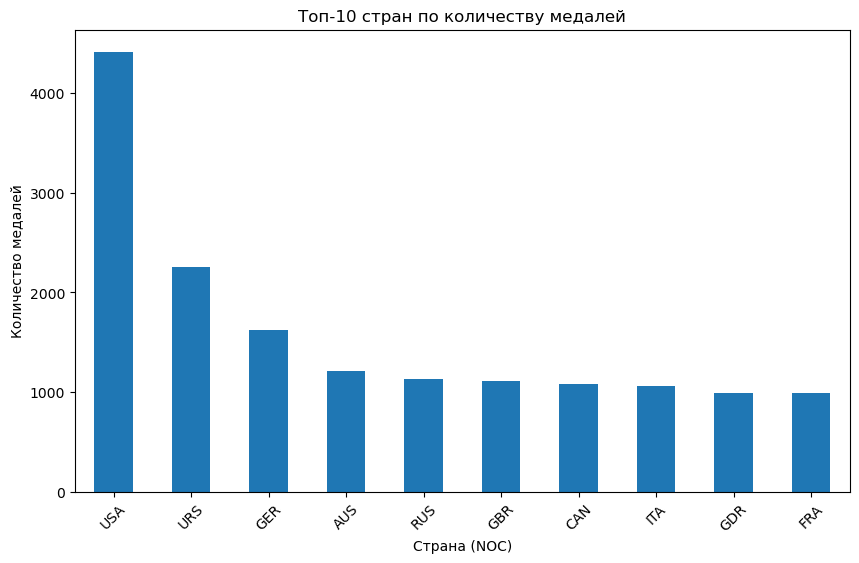

In [56]:
top_countries = df[df['Medal'].notna()]['NOC'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar')
plt.title('Топ-10 стран по количеству медалей')
plt.xlabel('Страна (NOC)')
plt.ylabel('Количество медалей')
plt.xticks(rotation=45)
plt.show()

США лидируют по общему количеству медалей, опережая другие страны, входящие в топ-10.

In [57]:
medalists = df[df['Medal'].notna()]
print("Средний рост:")
print(f"Медалисты: {medalists['Height'].mean():.1f} см")
print(f"Все спортсмены: {df['Height'].mean():.1f} см")
print(f"\nСредний вес:")
print(f"Медалисты: {medalists['Weight'].mean():.1f} кг")
print(f"Все спортсмены: {df['Weight'].mean():.1f} кг")

Средний рост:
Медалисты: 177.6 см
Все спортсмены: 175.4 см

Средний вес:
Медалисты: 73.8 кг
Все спортсмены: 70.7 кг


В среднем те спортсмены, которые выигрывают медали, выше и тяжелее, чем все остальные.

In [58]:
top_sports = df['Sport'].value_counts().head(10).to_frame()
top_sports

,count
Sport,
Athletics,32601
Swimming,18804
Gymnastics,18318
Rowing,7933
Cycling,7829
Cross Country Skiing,7537
Shooting,7300
Fencing,6540
Alpine Skiing,6350


Самые популярные виды спорта: атлетика,плавание и гимнастика.

#### Вывод
Анализ данных показывает,что спортсмены с высоким ростом и большим весом имеют преимущество и завоевывают большинство медалей.
Также анализ показал, что чаще всего игры проводились летом из - за этого летом спортсмены получили большинство медалей.